In [1]:
"""
Analyze daughter protons for annihilation event
author: Jiancheng Zeng
Date: June 24, 2024
"""

'\nAnalyze daughter protons for annihilation event\nauthor: Jiancheng Zeng\nDate: June 24, 2024\n'

In [2]:
import pandas as pd
import numpy as np
import time
import math
import matplotlib.pyplot as plt
import os
#from toy_model_analysis import Analyze_trace, read_data_from_toymodel
import toy_model_analysis
import corner

In [3]:
def read_data_from_toymodel(file_path):
    print("Reading data...\n")

    try:
        column_names = ['eventID', 'trackID', 'parentID', 'particleID', 'copyNb1 (mother volume)', 'copyNb', 'material', 'time (ns)', 'energy (MeV)', 'energy deposit (MeV)', 'parent process name', 'process name', 'px (MeV/c)', 'py (MeV/c)', 'pz (MeV/c)', 'step length (cm)', 'x (cm)', 'y (cm)', 'z (cm)']
        df = pd.read_csv(file_path, delimiter='\t', header=None, names=column_names)  # Assumes tab-separated values in the text file
 
        # Convert all columns to string data type
        df = df.astype(str)
        
        print("Grouping data...")
        # Group by eventID and trackID
        grouped_data = df.groupby(['eventID'])

        # Clear the data buffer
        del df

        print("Finished data reading!")
        return grouped_data
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None
    except pd.errors.ParserError:
        print(f"Error: Unable to parse data from '{file_path}'. Please ensure the file has the correct format.")
        return None

In [4]:
data = read_data_from_toymodel("/HDD/jiancheng/GRAMS/ToyModelData/2024/Daughter_anti_He3_1e5_test.dat")

Reading data...

Grouping data...
Finished data reading!


In [5]:
if data is not None:
    N_proton = []

    try:
        event_keys = list(data.groups.keys())
        # i is eventID
        for i in range(len(event_keys)):
            data_track = data.get_group(event_keys[i])
            data_track = data_track.groupby(['trackID'])
            track_keys = list(data_track.groups.keys())
            proton = 0
            mu_minus = 0
            # j is track ID
            for j in range(len(track_keys)):
                #if(str(data_track.get_group(track_keys[j]).iloc[0]['particleID']) == '211' and str(data_track.get_group(track_keys[j]).iloc[0]['material']) == 'LAr'):
                if(str(data_track.get_group(track_keys[j]).iloc[0]['particleID']) == '2212' and  str(data_track.get_group(track_keys[j]).iloc[0]['parentID']) == '1'):
                    proton = proton + 1

            N_proton.append(proton)
            toy_model_analysis.display_progress_bar(i+1, len(event_keys))

    except KeyError as e:
        print(f"KeyError: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")


[##################################################] 100.00% 100000/100000

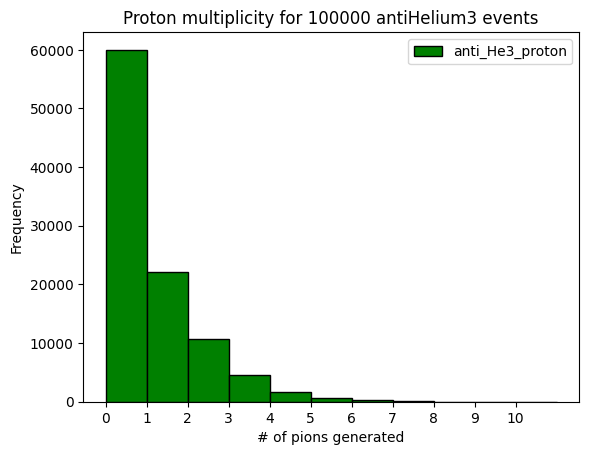

In [6]:

# This is for listing pi-/pi+/pi0 multiplicity

anti_He3_proton_profile = [N_proton]
anti_He3_proton_label = ['anti_He3_proton']
anti_He3_proton_color = ['green']

plt.figure(1)

# Determine the range of the data to set integer bins
all_values = N_proton
min_value = min(all_values)
max_value = max(all_values)
bins = range(min_value, max_value + 2)  # +2 to include the last integer

plt.hist(anti_He3_proton_profile, bins=bins, label=anti_He3_proton_label, color=anti_He3_proton_color, edgecolor='black')

# Add labels and title
plt.xlabel('# of pions generated')
plt.ylabel('Frequency')
plt.legend()
plt.title('Proton multiplicity for '+str(len(all_values))+ ' antiHelium3 events')

# Set x-ticks to be integers
plt.xticks(range(min_value, max_value + 1))

# Show the plot
plt.show()


In [7]:
data = []
proton_data = read_data_from_toymodel("/HDD/jiancheng/GRAMS/ToyModelData/2024/Daughter_anti_proton_1e5_test.dat")

Reading data...



: 

In [8]:
if proton_data is not None:
    proton_N_proton = []
    try:
        event_keys = list(proton_data.groups.keys())
        # i is eventID
        for i in range(len(event_keys)):
            proton_data_track = proton_data.get_group(event_keys[i])
            proton_data_track = proton_data_track.groupby(['trackID'])
            track_keys = list(proton_data_track.groups.keys())
            proton = 0
            # j is track ID
            for j in range(len(track_keys)):
                #if(str(proton_data_track.get_group(track_keys[j]).iloc[0]['particleID']) == '211' and str(proton_data_track.get_group(track_keys[j]).iloc[0]['material']) == 'LAr'):
                if(str(proton_data_track.get_group(track_keys[j]).iloc[0]['particleID']) == '2212' and str(proton_data_track.get_group(track_keys[j]).iloc[0]['parentID']) == '1'):
                    proton = proton + 1
            proton_N_proton.append(proton)

            toy_model_analysis.display_progress_bar(i+1, len(event_keys))

    except KeyError as e:
        print(f"KeyError: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")



[##################################################] 100.00% 100000/100000

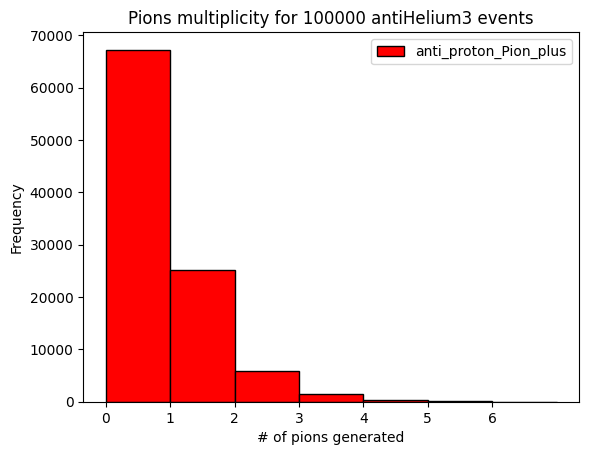

In [ ]:

# This is for listing pi-/pi+/pi0 multiplicity

anti_proton_proton_profile = [proton_N_proton]
anti_proton_proton_label = ['anti_proton_Pion_plus']
anti_proton_proton_color = ['red']


plt.figure(1)

# Determine the range of the data to set integer bins
all_values = proton_N_proton
min_value = min(all_values)
max_value = max(all_values)
bins = range(min_value, max_value + 2)  # +2 to include the last integer

plt.hist(anti_proton_proton_profile, bins=bins, label=anti_proton_proton_label, color=anti_proton_proton_color, edgecolor='black')

# Add labels and title
plt.xlabel('# of pions generated')
plt.ylabel('Frequency')
plt.legend()
plt.title('Pions multiplicity for '+str(len(all_values))+ ' antiHelium3 events')

# Set x-ticks to be integers
plt.xticks(range(min_value, max_value + 1))

# Show the plot
plt.show()


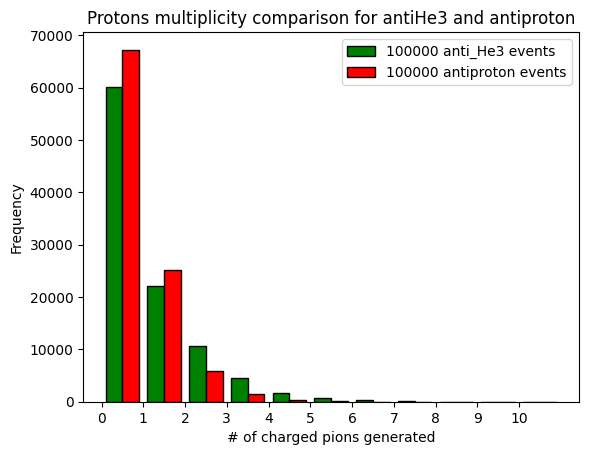

In [ ]:
He3bar_proton = np.array(N_proton)
protonbar_proton = np.array(proton_N_proton)

Charged_pion_comparison = [He3bar_proton, protonbar_proton]
Charged_pion_label = [f'{len(He3bar_proton)} anti_He3 events', f'{len(protonbar_proton)} antiproton events']
Charged_pion_color = ['green', 'red']

plt.figure(1)

# Determine the range of the data to set integer bins
all_values = np.append(He3bar_proton, protonbar_proton)
min_value = min(all_values)
max_value = max(all_values)
bins = range(min_value, max_value + 2)  # +2 to include the last integer

plt.hist(Charged_pion_comparison, bins=bins, label=Charged_pion_label, color=Charged_pion_color, edgecolor='black')

# Set x-ticks to be integers
plt.xticks(range(min_value, max_value + 1))


# Add labels and title
plt.xlabel('# of charged pions generated')
#plt.xticks(x_values, x_name, rotation=45, ha='right')
plt.ylabel('Frequency')
plt.legend()
plt.title('Protons multiplicity comparison for antiHe3 and antiproton')

# Show the plot
plt.show()

In [ ]:
cut_value = max(protonbar_charged_pion) - 2

keep_number = np.sum(He3bar_charged_pion > cut_value)
reject_number = np.sum(protonbar_charged_pion <= cut_value)
print("after cut all antiproton events, efficiency for He3bar remianing is", keep_number/len(He3bar_charged_pion))

print("Rejection factor for antiproton is: ", reject_number/len(protonbar_charged_pion))

NameError: name 'protonbar_charged_pion' is not defined